# Import Libraries

In [16]:
#import libraries
import numpy as np
import scipy.stats as sp
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from discreteMarkovChain import markovChain

# HealthCare Problem

## HealthCare Data

                $0  $0-$1000  $1000-$2000  $2000-$3000  $3000-$4000  \
$0           0.875     0.077        0.021        0.010        0.004   
$0-$1000     0.590     0.250        0.071        0.029        0.018   
$1000-$2000  0.392     0.183        0.249        0.075        0.029   
$2000-$3000  0.279     0.144        0.134        0.249        0.077   
$3000-$4000  0.216     0.103        0.064        0.145        0.198   
$4000-$5000  0.216     0.071        0.073        0.096        0.151   
$5000-$6000  0.190     0.101        0.057        0.062        0.094   
$6000-$7000  0.218     0.096        0.038        0.079        0.071   
$7000-$8000  0.188     0.102        0.076        0.061        0.076   
$8000+       0.229     0.104        0.068        0.068        0.060   

             $4000-$5000  $5000-$6000  $6000-$7000  $7000-$8000  $8000+  
$0                 0.003        0.002        0.001        0.001   0.005  
$0-$1000           0.009        0.005        0.006        0.003   0.01

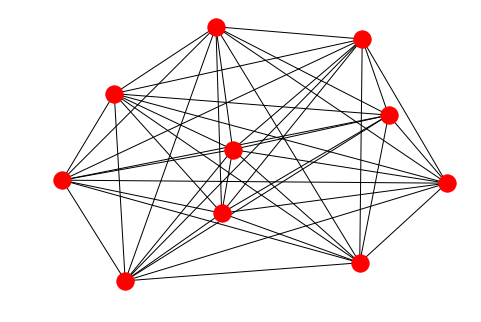

In [17]:
#Read health data, drop indices, drop extraneous rows & columns, format for math
health = pd.read_csv('health.csv',)
health = health.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1)
health = health.drop([0,1])
health = health.values
health = health.astype('double')
#Recreate indices, return loaded data
costIndex = pd.Series(['$0',
                       '$0-$1000',
                       '$1000-$2000',
                       '$2000-$3000',
                       '$3000-$4000',
                       '$4000-$5000',
                       '$5000-$6000',
                       '$6000-$7000',
                       '$7000-$8000',
                       '$8000+'])
healthData = pd.DataFrame(health)
healthData.columns = costIndex
healthData.index = costIndex
print(healthData)
#Draw graph of health data transition network
nx.draw(nx.Graph(health))
plt.show()

## First Passage Probabilities

In [18]:
#Recursive method with helper function to calculate first passage probability
def firstPassage(P,i,j,N):
    if N != 1: return (P[i][j])**N - sigma(P,i,j,N)
    else: return (P[i][j])
def sigma(P,i,j,N):

    sig = 0
    for k in range(N-1,0,-1):
        sig = sig + (firstPassage(P,i,j,k))*((P[j][j])**(N-k))
    return sig    

## Mean First Passage Time 
### (As described by Timothy Klocker)

In [19]:
P = health.copy()
I = P.copy()
I[:] = 0
np.fill_diagonal(I,1)
onevec = np.array([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]])
P[:,0] = 0
A = I - P
A = np.linalg.inv(A)
Avec = A*onevec
Avec

array([[ 1.        ,  0.13170853,  0.05284461,  0.03301909,  0.01940305,
         0.01350483,  0.01006269,  0.00600091,  0.0049735 ,  0.02210587],
       [ 0.        ,  1.4304756 ,  0.17646959,  0.10534849,  0.07003062,
         0.04457232,  0.0322918 ,  0.02287054,  0.01648624,  0.07573226],
       [ 0.        ,  0.45724468,  1.45420904,  0.22044292,  0.12272261,
         0.08230924,  0.06130874,  0.0353608 ,  0.03135923,  0.13268872],
       [ 0.        ,  0.47334011,  0.37428339,  1.48313424,  0.22643813,
         0.1315508 ,  0.08933531,  0.05487754,  0.05118688,  0.19965849],
       [ 0.        ,  0.45703932,  0.31330216,  0.41089266,  1.41464386,
         0.27862748,  0.1684106 ,  0.07940849,  0.0696208 ,  0.279344  ],
       [ 0.        ,  0.42354406,  0.32484943,  0.35749603,  0.37453096,
         1.3511772 ,  0.19647455,  0.11254901,  0.07758399,  0.32364136],
       [ 0.        ,  0.46973426,  0.30540115,  0.3103618 ,  0.3075976 ,
         0.23264744,  1.35894687,  0.16300124

## HealthCare Conclusions

### First Passage Time
* Method keeps producing negative numbers
* Desired value unclear

### Mean First Passage Time
* Method adapted from Tim Klocker
* Unable to calculate mean from matrix (should be vector)

# PageRank Problem

## PageRank Data

In [20]:
#read web data, drop extraneous rows & columns, format for math
web = pd.read_csv('web.csv')
web = web.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1)
web = web.drop([0,1])
web = web.values
web = web.astype('double')
web = pd.DataFrame(web)

## PageRank Method

In [21]:
#Receives the matrix of links "sites", where links are denoted by '1' and absence by '0'
def pageRank(sites):
#Uses the input matrix to create a component "rand" to account for the 15% random path to any site
    rand = np.array(sites)
    #fills "rand" with '1's
    rand[:] = 1
    rand = rand - sites
#Sum all links in a row
    sitelinks = pd.Series(sites.sum(axis=1))
    randlinks = pd.Series(rand.sum(axis=1))
#Divide each row in the "sites" matrix by its sum
    sites = sites.T
    rand = rand.T
    for i in range(len(sites.index)):
        sites[i] = sites[i]/sitelinks[i]
        rand[i] = rand[i]/randlinks[i]
    sites = sites.T
    rand = rand.T
#Sum the working and random components with appropriate weights
#Return "final", the final PageRank transition matrix
    final = (0.85*sites) + (0.15*rand)
    return final

## Check Method

In [22]:
#Receives PageRank transition matrix
def rankCheck(final):
#Check that all rows sum to 1 by checking that all row sums sum to 100.0
    #i.e. "final" IS a markov state matrix
#Return the status of the check
    finalCheck = final.sum(axis=1)
    if finalCheck.sum() == 100.0:
        return "PageRank!"
    else:
        return "This isn't working"

## Test

In [25]:
#TEST
test = pageRank(web)
print(rankCheck(test))
print()
#Compute steady state vector, i.e. ranks of pages
mc = markovChain(test.values)
mc.computePi('linear')
final = (pd.Series(mc.pi))
final = final.sort_values(ascending=False)
final

PageRank!



3     0.015842
93    0.015724
17    0.015687
65    0.015164
39    0.014686
55    0.014446
28    0.014429
22    0.014192
32    0.014167
27    0.014056
18    0.014007
5     0.013991
8     0.013942
57    0.013776
43    0.013763
9     0.013734
48    0.013709
97    0.013658
14    0.013642
6     0.013615
49    0.013543
7     0.013522
36    0.013506
74    0.013480
69    0.013437
62    0.013321
77    0.013280
85    0.013279
90    0.013153
41    0.013080
        ...   
31    0.008209
19    0.007976
42    0.007709
56    0.007434
86    0.007423
21    0.006994
13    0.006952
95    0.006800
53    0.006678
78    0.006174
10    0.005691
61    0.005585
67    0.005560
45    0.005529
46    0.004625
81    0.004334
2     0.004138
44    0.004007
76    0.003702
91    0.003525
0     0.003411
92    0.003320
16    0.002918
63    0.002768
82    0.002221
88    0.002017
12    0.001964
94    0.001927
33    0.001658
24    0.001515
Length: 100, dtype: float64